# Clasificación Básica: Predecir una imagen de moda

Entrena un modelo de red neuronal para clasificar imagenes de ropa como, tennis y camisetas.

Usa [tf.keras](https://www.tensorflow.org/guide/keras), un API de alto nivel para construir y entrenar modelos en Tensorflow.

## Importar el set de datos de moda de MNIST

Usa el set de datos de [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)
que contiene mas de 70,000 imagenes en 10 categorias. Las imagenes muestran articulos individuales de ropa a una resolucion baja (28 por 28 pixeles) como se ve aca:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

La *class* de ropa que la imagen representa.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen es mapeada a una unica etiqueta.

# Explore el set de datos

* ¿Cuántas imágenes hay en train?
* ¿Y en test?
* ¿De cuántos pixels se compone cada imagen?
* ¿Cuáles son los valores de los labels?#

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
len(np.unique(y_test))

10

In [2]:
len(np.unique(y_train))

NameError: name 'y_train' is not defined

In [189]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [190]:
# Información sobre el conjunto de datos
print(f"Cantidad de imágenes en entrenamiento: {X_train.shape[0]}")
print(f"Cantidad de imágenes en prueba: {X_test.shape[0]}")
print(f"Dimensiones de cada imagen (píxeles): {X_train.shape[1:]}")
print(f"Valores únicos de las etiquetas: {set(y_train)}")

Cantidad de imágenes en entrenamiento: 60000
Cantidad de imágenes en prueba: 10000
Dimensiones de cada imagen (píxeles): (28, 28)
Valores únicos de las etiquetas: {np.uint8(0), np.uint8(1), np.uint8(2), np.uint8(3), np.uint8(4), np.uint8(5), np.uint8(6), np.uint8(7), np.uint8(8), np.uint8(9)}


## Pre-procese el set de datos

Inspecciona y representa la primera imagen del dataset de train. Para ello, utiliza la función `imshow` de matplotlib.

C:\Users\mikel\AppData\Local\Temp\ipykernel_17632\156772231.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('gray'));


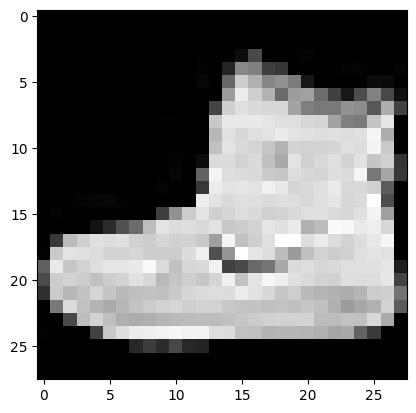

In [191]:
plt.imshow(X_train[0], cmap=plt.cm.get_cmap('gray'));

Escala los conjuntos de train y test para que vayan del 0 al 1. No hace falta usar ninguna librería. Con realizar una división en cada conjunto será suficiente.

In [192]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [193]:
np.max(X_train)

np.float32(1.0)

In [194]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [195]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

In [196]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [197]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [198]:
'''
# Escalar los conjuntos de entrenamiento y prueba para que estén en el rango [0, 1]
def scale_data(data):
    return data / 255.0

# Escalar los datos
X_train_scaled = scale_data(X_train)
X_test_scaled = scale_data(X_test)

# Verificar el rango
print(f"Rango de X_train_scaled: {X_train_scaled.min()} a {X_train_scaled.max()}")
print(f"Rango de X_test_scaled: {X_test_scaled.min()} a {X_test_scaled.max()}")
'''

'\n# Escalar los conjuntos de entrenamiento y prueba para que estén en el rango [0, 1]\ndef scale_data(data):\n    return data / 255.0\n\n# Escalar los datos\nX_train_scaled = scale_data(X_train)\nX_test_scaled = scale_data(X_test)\n\n# Verificar el rango\nprint(f"Rango de X_train_scaled: {X_train_scaled.min()} a {X_train_scaled.max()}")\nprint(f"Rango de X_test_scaled: {X_test_scaled.min()} a {X_test_scaled.max()}")\n'

## Construir el Modelo

Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

### Configurar las Capas
Construye todas las capas del modelo.

In [199]:
28*28

784

In [200]:
X_train.shape

(50000, 28, 28)

In [201]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

In [202]:
print(model.layers[0])

<Flatten name=flatten_9, built=True>


In [203]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [204]:
weights

array([[ 0.05819771,  0.05485825, -0.04289102, ...,  0.06205603,
         0.02172868,  0.03621958],
       [ 0.07322741,  0.05379884, -0.00147267, ...,  0.06081103,
        -0.03194745, -0.05491127],
       [-0.03296192, -0.04627332,  0.0490298 , ...,  0.04418806,
        -0.05077469, -0.05690295],
       ...,
       [-0.01535573,  0.03600813,  0.03603243, ..., -0.04332377,
         0.00701091, -0.01324739],
       [-0.0656081 , -0.02263762, -0.05730157, ...,  0.02214073,
        -0.03023423, -0.01678184],
       [ 0.05413184, -0.00144333, -0.03205863, ...,  0.07384829,
        -0.03632599, -0.0135566 ]], dtype=float32)

In [205]:
len(weights)

784

In [206]:
len(weights[0])

300

In [207]:
weights.size

235200

In [208]:
len(biases)

300

### Compila el modelo

Antes de que el modelo este listo para entrenar , se necesitan algunas configuraciones más. Estas son agregadas durante el paso de compilacion del modelo:

* *Loss function* —Esto mide que tan exacto es el modelo durante el entrenamiento. Quiere minimizar esta función para dirigir el modelo en la dirección adecuada.
* *Optimizer* — Esto es cómo el modelo aprende basado en el set de datos que ve y la función de pérdida.
* *Metrics* — Se usan para monitorear los pasos de entrenamiento y de pruebas.


Como es un problema de clasificación multiclase, tendrás que usar `sparse_categorical_crossentropy` como función de coste. En cuanto a las métricas, usa simplemente `accuracy`.

In [209]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [210]:
# Summary
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Entrenar el Modelo
Empieza entrenándolo con 10 epochs. Prueba con más

In [211]:
X_train.shape

(50000, 28, 28)

In [212]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4496 - sparse_categorical_accuracy: 0.5633 - val_loss: 0.7345 - val_sparse_categorical_accuracy: 0.7579
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6944 - sparse_categorical_accuracy: 0.7722 - val_loss: 0.6046 - val_sparse_categorical_accuracy: 0.7977
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5878 - sparse_categorical_accuracy: 0.8073 - val_loss: 0.5547 - val_sparse_categorical_accuracy: 0.8100
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5348 - sparse_categorical_accuracy: 0.8199 - val_loss: 0.5125 - val_sparse_categorical_accuracy: 0.8245
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5005 - sparse_categorical_accuracy: 0.8315 - val_loss: 0.4912 - val_sparse_categorical_accuracy: 0.8288
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4813 - sparse_categorical_accuracy: 0.8359 - val_loss: 0.4750 - val_sparse_categorical_accuracy: 0.8347
Epoc

In [213]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'loss': [1.0866482257843018, 0.6588900089263916, 0.5697290897369385, 0.5239076614379883, 0.49509283900260925, 0.4752788245677948, 0.4593479037284851, 0.4480711817741394, 0.4372217655181885, 0.4286052882671356, 0.42105650901794434, 0.41350921988487244, 0.407147616147995, 0.40087711811065674, 0.3951643109321594, 0.39029401540756226, 0.38551777601242065, 0.3809162974357605, 0.3757701516151428, 0.3728674650192261, 0.3692639172077179, 0.3653470277786255, 0.36175182461738586, 0.35851749777793884, 0.35564059019088745, 0.35249292850494385, 0.3493863344192505, 0.34658750891685486, 0.3435603082180023, 0.3411785960197449, 0.3382006287574768, 0.33619391918182373, 0.3329078257083893, 0.3294737637042999, 0.32795825600624084, 0.32566043734550476, 0.32349222898483276, 0.3200530409812927, 0.3181258738040924, 0.316263884305954, 0.31334370374679565, 0.31191858649253845, 0.3085756301879883, 0.3075544834136963, 0.30637043714523315, 0.30463406443595886, 0.30056309700012207, 0.2986708879470825, 0.2976871728

## Evaluar Accuracy
Prueba el rendimiento del modelo con los datos de test

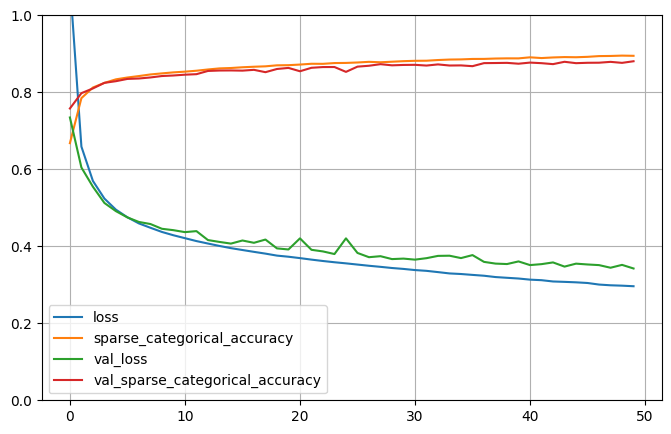

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

## Hacer predicciones

Con el modelo entrenado puedes usarlo para hacer predicciones sobre imagenes.

In [215]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
(1, 10)


array([[9.0911262e-06, 2.8857366e-07, 1.0348240e-05, 3.2507940e-06,
        7.9654374e-06, 3.9642952e-02, 4.0728799e-05, 3.1117249e-02,
        1.0149833e-03, 9.2815310e-01]], dtype=float32)

In [216]:
predictions.argmax()

np.int64(9)

In [217]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

El modelo ha predecido la etiqueta para cada imagen en el set de datos de *test* (prueba).

*Una* prediccion es un array de 10 numeros. Estos representan el nivel de "confianza" del modelo sobre las imagenes de cada uno de los 10 articulos de moda/ropa. Puedes revisar cual tiene el nivel mas alto de confianza:

In [219]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[837,   0,  26,  43,   5,   3,  75,   0,  11,   0],
       [  3, 958,   4,  28,   2,   0,   4,   0,   1,   0],
       [ 14,   1, 838,  16,  82,   0,  47,   0,   2,   0],
       [ 23,   8,  16, 906,  27,   0,  14,   0,   6,   0],
       [  2,   0, 126,  39, 773,   0,  57,   0,   3,   0],
       [  0,   0,   0,   1,   0, 955,   0,  29,   2,  13],
       [143,   1, 116,  45,  65,   0, 612,   0,  18,   0],
       [  0,   0,   0,   0,   0,  27,   0, 936,   0,  37],
       [  6,   1,  10,  11,   6,   2,   4,   6, 954,   0],
       [  1,   0,   0,   0,   0,   8,   0,  39,   0, 952]])

Entonces, el modelo tiene mayor confianza que esta imagen es un bota de tobillo "ankle boot" o `class_names[9]`. Examinando las etiquetas de *test* o de pruebas muestra que esta clasificación es correcta:

C:\Users\mikel\AppData\Local\Temp\ipykernel_17632\1081580451.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[9].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


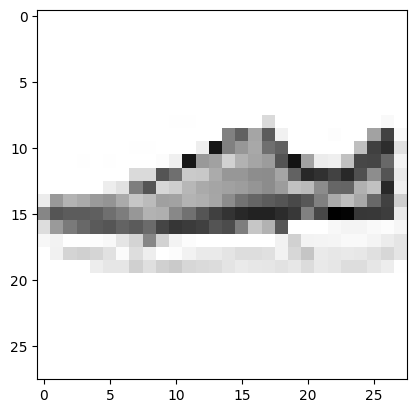

In [221]:
plt.imshow(X_test[9].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

Evalúa tu modelo con una matriz de confusión e interprétala.

Finalmente, usamos el modelo entrenado para hacer una prediccion sobre una única imagen.